In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#### Data Loading

In [2]:
df = pd.read_csv('../zuu crew scores.csv')
df = df[df['CourseName']=='Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [3]:
X = df['Attendance'].values
Y = df['CapstoneScore'].values
X

array([79.9, 76.8, 96.6, 83.2, 86.5, 76.6, 83.8, 90. , 68.4, 95.9, 68.2,
       67.6, 61.5, 82.6, 78.1, 66.2, 94.5, 70.8, 66.2, 86.4, 68.9, 69.2,
       64.2, 92. , 86.1, 94.2, 75.9, 68.2, 95.9, 60.5, 83.3, 95.7, 92.7,
       70.4, 75.2, 83.6, 70.7, 71.8, 97.9, 79.5, 60.9, 70.7, 81.7, 85.3,
       70.3, 65.6, 93.4, 99.4, 70.9, 60.7, 64.7, 83.1, 71. , 65.5, 95. ,
       83.9, 67. , 96.6, 76.8, 63.3, 69.8, 75.6, 71.5, 82.7, 79. , 86.5,
       97.5, 89.3, 68.6, 79.9, 83.9, 90.8])

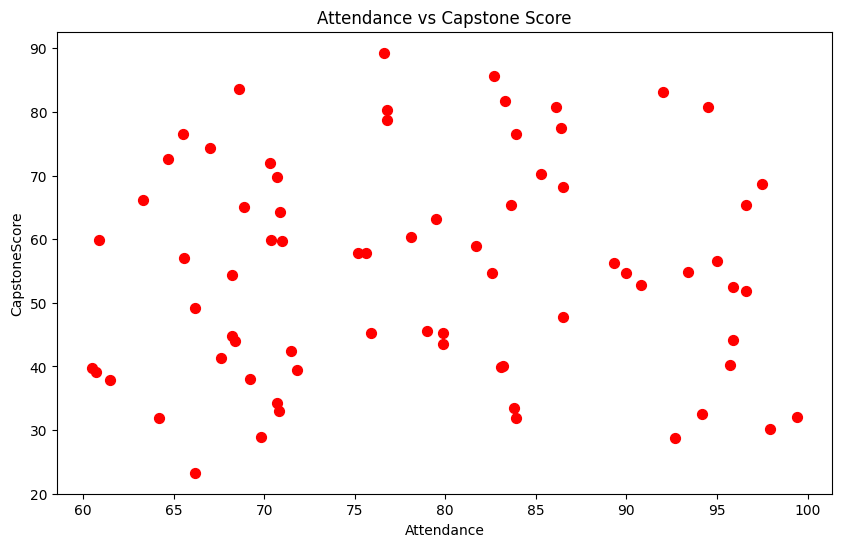

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X,Y,color='red',s=50)
plt.xlabel('Attendance')
plt.ylabel('CapstoneScore')
plt.title('Attendance vs Capstone Score')
plt.show()

In [5]:
degree = 3

#### Polynomial Feature 

In [6]:
n = len(X)

X_scaled = (X - X.mean()) / X.std()

# Polynomial features
X_poly = np.ones((n, degree + 1))
for i in range(1, degree + 1):
    X_poly[:, i] = X_scaled**i


#### Compute cost

In [7]:
def compute_cost(X,beta,Y):
    y_hat = X.dot(beta) 
    m = len(Y)
    cost = (1 /(2 * m)) * np.sum((y_hat - Y)**2)
    return cost

#### Optimization

In [8]:
cost_history=[]
def gradient_descent(X,Y,beta,n_iter,lr):
    m = len(Y)

    for i in range(n_iter):
        y_hat = X.dot(beta) 
        gradient = (1/m) * X.T.dot(y_hat - Y)
        beta = beta - lr * gradient
        cost  = compute_cost(X,beta,Y)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"iteration: {i}, beta:{beta}, cost:{cost}")
    
    return beta


In [9]:
X_with_bias = X_poly
beta = np.random.randn(degree + 1)
n_iter = 10000
lr = 0.01

In [10]:
beta = gradient_descent(X_with_bias,Y,beta,n_iter,lr)

iteration: 0, beta:[ 0.59700956  0.43473948 -0.00858448 -1.04691216], cost:1639.781470803598
iteration: 100, beta:[27.56206282 -0.1957885  14.37617999 -1.0976309 ], cost:362.7592524401162
iteration: 200, beta:[37.31095551  0.52680057 10.65247591 -1.45237262], cost:249.91857359306792
iteration: 300, beta:[43.50227187  1.34683035  6.69854833 -1.43366273], cost:194.88299773705924
iteration: 400, beta:[47.91786116  2.00271655  3.71038214 -1.40730919], cost:165.8277830596895
iteration: 500, beta:[51.11904925  2.51234803  1.53031436 -1.40004088], cost:150.46330483866308
iteration: 600, beta:[ 5.34447633e+01  2.90963192e+00 -5.26959717e-02 -1.40730085e+00], cost:142.3353798006199
iteration: 700, beta:[55.13483887  3.2216393  -1.20110779 -1.42371934], cost:138.03339943796627
iteration: 800, beta:[56.36298805  3.46866672 -2.03382638 -1.44538649], cost:135.75472592972966
iteration: 900, beta:[57.25541653  3.66586595 -2.63732555 -1.46962324], cost:134.54646468418457
iteration: 1000, beta:[57.9038

#### Analyze Cost

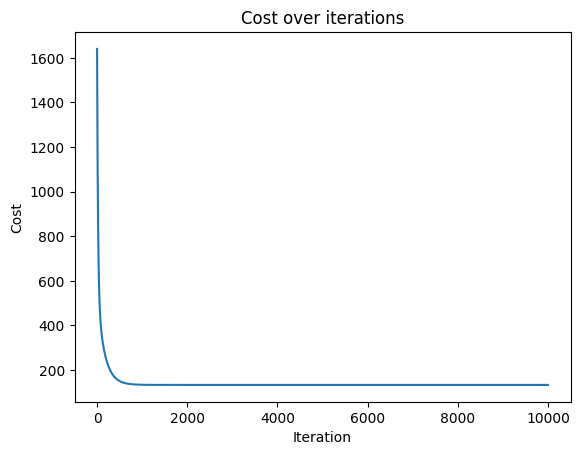

In [11]:

plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost over iterations')
plt.show()

#### Predict Function

In [12]:
def predict(X,beta,degree):
    n = len(X)

    X_scaled = (X - X.mean()) / X.std()

    # Polynomial features
    X_poly = np.ones((n, degree + 1))
    for i in range(1, degree + 1):
        X_poly[:, i] = X_scaled**i
    return X_poly.dot(beta)

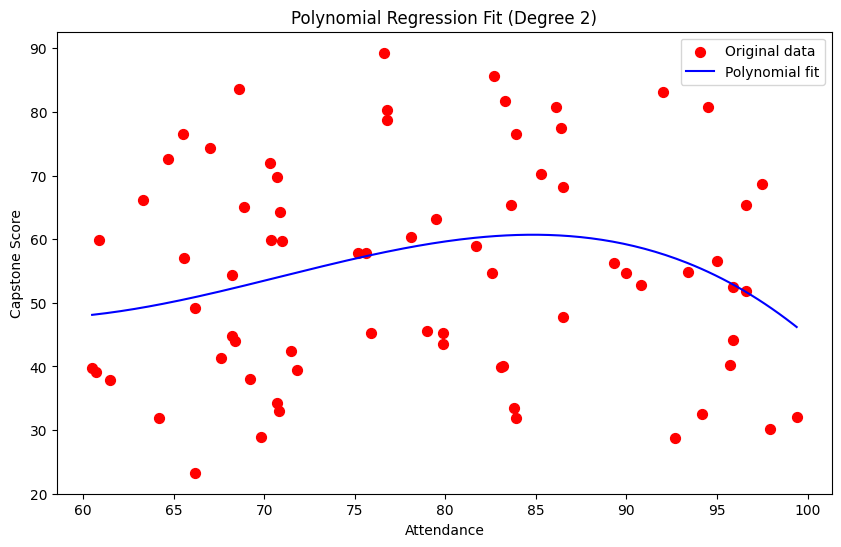

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='red', s=50, label='Original data')

X_line = np.linspace(min(X), max(X), 200)
Y_line = predict(X_line, beta, degree)

plt.plot(X_line, Y_line, color='blue', label='Polynomial fit')
plt.xlabel('Attendance')
plt.ylabel('Capstone Score')
plt.title('Polynomial Regression Fit (Degree 2)')
plt.legend()
plt.show()

#### Model Evaluation

In [14]:
Y_hat = predict(X, beta, degree)
Y_hat

array([60.0221582 , 58.64848558, 49.39854129, 60.68643909, 60.26410166,
       58.54035993, 60.69835832, 58.32877109, 53.06053242, 50.72131272,
       52.91938083, 52.49917544, 48.85570433, 60.6385986 , 59.29806447,
       51.54533872, 53.08294957, 54.77167294, 51.54533872, 60.29546066,
       53.41521288, 53.62895694, 50.28136432, 56.41460703, 60.382143  ,
       53.54129319, 58.14645   , 52.91938083, 50.72131272, 48.43584767,
       60.69096385, 51.08159584, 55.59115138, 54.48645867, 57.73043227,
       60.69847634, 54.70045458, 55.47881033, 46.67985995, 59.88073065,
       48.59578575, 54.70045458, 60.50302362, 60.56038642, 54.41503805,
       51.15186361, 54.68394565, 43.10117228, 54.84282201, 48.51444268,
       50.58376301, 60.68091653, 54.91389431, 51.08736109, 52.28206426,
       60.69673895, 52.08510212, 49.39854129, 58.64848558, 49.76444638,
       54.05760707, 57.970714  , 55.26784214, 60.64899791, 59.68778545,
       60.26410166, 47.55338773, 58.85325006, 53.20212573, 60.02

In [15]:
def MSE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(e_i**2)

def MAE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(np.abs(e_i))

def R2_Score(Y,Y_hat):
    y_mean = np.mean(Y)
    e_i = Y - Y_hat
    std_i = Y - y_mean

    E = np.sum(e_i**2) / np.sum(std_i ** 2)
    return 1 - E

def RMSE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.sqrt(np.mean((Y - Y_hat) ** 2))

In [16]:
mse = MSE(Y, Y_hat)
mae = MAE(Y, Y_hat)
r2 = R2_Score(Y, Y_hat)
rmse = RMSE(Y,Y_hat)

print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"R2 Score : {r2}")
print(f"RMSE : {rmse}")

MSE : 266.3283111958766
MAE : 13.831030956326268
R2 Score : 0.06789832501421833
RMSE : 16.319568352008474


#### SKlearn

In [17]:

X_reshaped = X.reshape(-1, 1)

degree = 3
poly = PolynomialFeatures(degree=degree, include_bias=True)
X_poly_sklearn = poly.fit_transform(X_reshaped)

model = LinearRegression()
model.fit(X_poly_sklearn, Y)

# Get coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.00000000e+00 -1.75652840e+01  2.61615819e-01 -1.24802275e-03]
Intercept: 429.92478639995943
